(traffic-fines)=
# Traffic fines

## Background

https://www.gipuzkoairekia.eus/

## The data

In [185]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily

# Read the data
usecols=[0, 4, 5, 6, 7, 8] # Useful columns
fines_2018 = pd.read_csv("data/multas_2018.csv", sep=";", decimal=",", usecols=usecols)
fines_2019 = pd.read_csv("data/multas_2019.csv", sep=";", decimal=",", usecols=usecols)
fines_2020 = pd.read_csv("data/multas_2020.csv", sep=";", decimal=",", usecols=usecols)
fines_2021 = pd.read_csv("data/multas_2021.csv", sep=";", decimal=",", usecols=usecols)
fines_2022 = pd.read_csv("data/multas_2022.csv", sep=";", decimal=",", usecols=usecols)

# Concatenate the data from different years into a unique dataset
fines = pd.concat([fines_2018, fines_2019, fines_2020, fines_2021, fines_2022])

# Rename columns
fines = fines.rename(columns={"AÑO": "year",
                              "NOMBRE CALLE": "street",
                              "CALIFICACION": "category",
                              "NRO MULTAS": "fines",
                              "IMPORTE PAGADO": "paid",
                              "IMPORTE PENDIENTE DE PAGO EN EJECUTIVA": "unpaid"})
print(fines)

    year                street   category  fines    paid  unpaid
0   2018                   NaN       LEVE      2    15.0    0.00
1   2018  GELTOKIEN ENPARANTZA      GRAVE      3     0.0  234.95
2   2018  GELTOKIEN ENPARANTZA       LEVE     52   640.8  279.15
3   2018  GELTOKIEN ENPARANTZA  MUY GRAVE      2   500.0    0.00
4   2018    EUSKADI ENPARANTZA      GRAVE      4   200.0  244.95
..   ...                   ...        ...    ...     ...     ...
75  2022              IBAIONDO      GRAVE      2   200.0    0.00
76  2022              IBAIONDO       LEVE     45   385.0  259.65
77  2022  ESKUALDEKO OSPITALEA      GRAVE     34  2100.0  949.80
78  2022  ESKUALDEKO OSPITALEA       LEVE     62   675.0  533.55
79  2022                 ANTIO       LEVE      1     0.0    0.00

[340 rows x 6 columns]


## Data validation

In [186]:
# Dataframe inspection
fines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 79
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      340 non-null    int64  
 1   street    337 non-null    object 
 2   category  340 non-null    object 
 3   fines     340 non-null    int64  
 4   paid      340 non-null    float64
 5   unpaid    340 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 18.6+ KB


In [187]:
# Rows with NaN values
print(fines[fines["street"].isna()])

   year street   category  fines   paid  unpaid
0  2018    NaN       LEVE      2   15.0     0.0
0  2020    NaN  MUY GRAVE      2  120.0     0.0
0  2021    NaN  MUY GRAVE      1    0.0     0.0


In [188]:
# Discard rows with NaN values
fines = fines[~fines["street"].isna()]

In [189]:
# Check dataframe
fines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 1 to 79
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      337 non-null    int64  
 1   street    337 non-null    object 
 2   category  337 non-null    object 
 3   fines     337 non-null    int64  
 4   paid      337 non-null    float64
 5   unpaid    337 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 18.4+ KB


## Exploratory Data Analysis

### Fines by street

In [190]:
# Group by streets and fine category, then sum up fines
fines_streets = fines.groupby(["street", "category"])["fines"].sum().unstack()

# Rearrange column order: LEVE, GRAVE, MUY GRAVE
fines_streets = fines_streets.iloc[:, [1, 0, 2]]

# Create new column with the total amount of fines: LEVE + GRAVE + MUY GRAVE
fines_streets["total"] = fines_streets.sum(axis=1)

# Sort values by total amount of fines
fines_streets = fines_streets.sort_values("total", ascending=False)

print(fines_streets)

category                        LEVE  GRAVE  MUY GRAVE  total
street                                                       
ZELAI-ARIZTI PARKEA            916.0    2.0        NaN  918.0
SEKUNDINO ESNAOLA KALEA        619.0   29.0        2.0  650.0
ESKUALDEKO OSPITALEA           422.0  165.0        NaN  587.0
GELTOKIEN ENPARANTZA           504.0   21.0        6.0  531.0
PIEDAD KALEA                   429.0   32.0        1.0  462.0
BIDEZAR KALEA                  352.0   25.0        NaN  377.0
KALEBARREN                     269.0   25.0        NaN  294.0
ELIZKALE                       202.0   49.0        3.0  254.0
SAN GREGORIO KALEA             169.0   21.0        3.0  193.0
LEGAZPI KALEA                  167.0    6.0        NaN  173.0
ELKANO KALEA                   143.0   22.0        1.0  166.0
EUSKADI ENPARANTZA             137.0   12.0        NaN  149.0
URDANETA HIRIBIDEA             122.0   21.0        1.0  144.0
JAI-ALAI KALEA                 123.0    6.0        NaN  129.0
ESTEBAN 

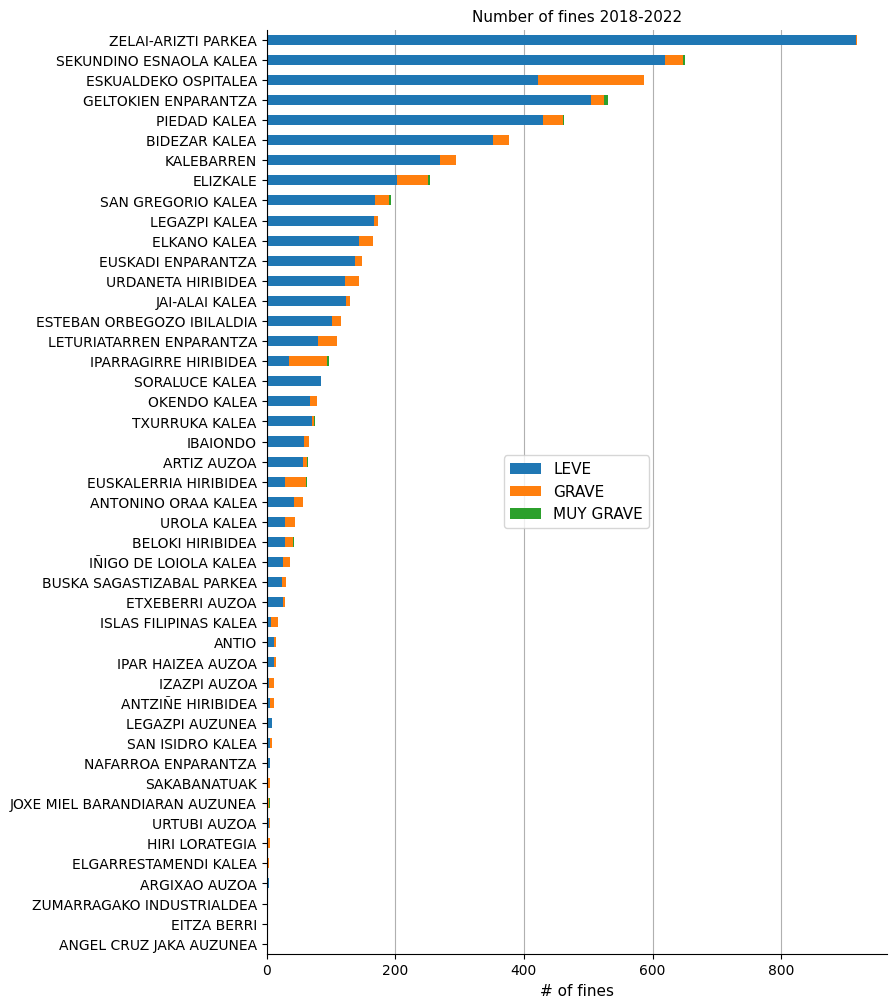

In [191]:
# Plot
fig, ax = plt.subplots(figsize=(8, 12))

fines_streets.sort_values("total").drop("total", axis=1).plot(ax=ax, kind="barh", stacked=True)

ax.grid(axis="x")
ax.set_axisbelow(True)
ax.set_title("Number of fines 2018-2022", size=11)
ax.set_xlabel("# of fines", fontsize=11)
ax.set_ylabel("")
ax.legend(fontsize=11, loc='center')
sns.despine()

plt.show()

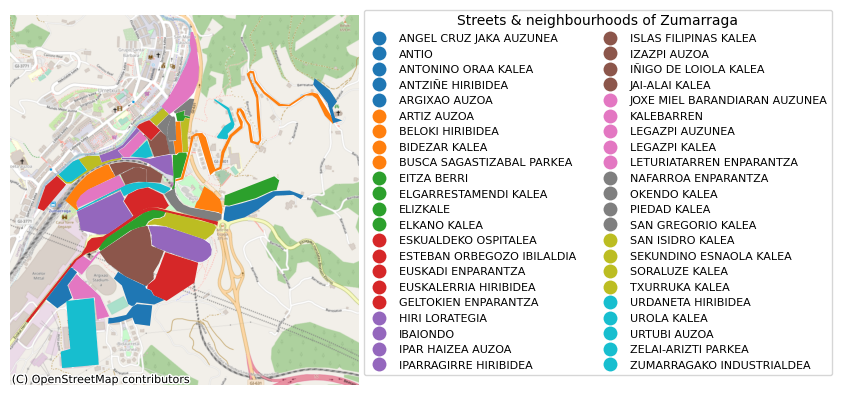

In [192]:
# Read geographical data of streets into a geopandas dataframe
zelai = gpd.read_file("geojson/zelai_arizti_parkea.geojson")
zelai["street"] = "ZELAI-ARIZTI PARKEA"
sekundino = gpd.read_file("geojson/sekundino_esnaola_kalea.geojson")
sekundino["street"] = "SEKUNDINO ESNAOLA KALEA"
ospitalea = gpd.read_file("geojson/eskualdeko_ospitalea.geojson")
ospitalea["street"] = "ESKUALDEKO OSPITALEA"
geltokien = gpd.read_file("geojson/geltokien_enparantza.geojson")
geltokien["street"] = "GELTOKIEN ENPARANTZA"
piedad = gpd.read_file("geojson/piedad_kalea.geojson")
piedad["street"] = "PIEDAD KALEA"
bidezar = gpd.read_file("geojson/bidezar_kalea.geojson")
bidezar["street"] = "BIDEZAR KALEA"
kalebarren = gpd.read_file("geojson/kalebarren.geojson")
kalebarren["street"] = "KALEBARREN"
elizkale = gpd.read_file("geojson/elizkale.geojson")
elizkale["street"] = "ELIZKALE"
gregorio = gpd.read_file("geojson/san_gregorio_kalea.geojson")
gregorio["street"] = "SAN GREGORIO KALEA"
legazpi = gpd.read_file("geojson/legazpi_kalea.geojson")
legazpi["street"] = "LEGAZPI KALEA"
elkano = gpd.read_file("geojson/elkano_kalea.geojson")
elkano["street"] = "ELKANO KALEA"
euskadi = gpd.read_file("geojson/euskadi_enparantza.geojson")
euskadi["street"] = "EUSKADI ENPARANTZA"
urdaneta = gpd.read_file("geojson/urdaneta_hiribidea.geojson")
urdaneta["street"] = "URDANETA HIRIBIDEA"
jai = gpd.read_file("geojson/jai_alai_kalea.geojson")
jai["street"] = "JAI-ALAI KALEA"
orbegozo = gpd.read_file("geojson/esteban_orbegozo_ibilaldia.geojson")
orbegozo["street"] = "ESTEBAN ORBEGOZO IBILALDIA"
leturia = gpd.read_file("geojson/leturiatarren_enparantza.geojson")
leturia["street"] = "LETURIATARREN ENPARANTZA"
iparragirre = gpd.read_file("geojson/iparragirre_hiribidea.geojson")
iparragirre["street"] = "IPARRAGIRRE HIRIBIDEA"
soraluze = gpd.read_file("geojson/soraluze_kalea.geojson")
soraluze["street"] = "SORALUZE KALEA"
okendo = gpd.read_file("geojson/okendo_kalea.geojson")
okendo["street"] = "OKENDO KALEA"
txurruka = gpd.read_file("geojson/txurruka_kalea.geojson")
txurruka["street"] = "TXURRUKA KALEA"
ibaiondo = gpd.read_file("geojson/ibaiondo.geojson")
ibaiondo["street"] = "IBAIONDO"
artiz = gpd.read_file("geojson/artiz_auzoa.geojson")
artiz["street"] = "ARTIZ AUZOA"
euskalerria = gpd.read_file("geojson/euskalerria_hiribidea.geojson")
euskalerria["street"] = "EUSKALERRIA HIRIBIDEA"
oraa = gpd.read_file("geojson/antonino_oraa_kalea.geojson")
oraa["street"] = "ANTONINO ORAA KALEA"
urola = gpd.read_file("geojson/urola_kalea.geojson")
urola["street"] = "UROLA KALEA"
beloki = gpd.read_file("geojson/beloki_hiribidea.geojson")
beloki["street"] = "BELOKI HIRIBIDEA"
loiola = gpd.read_file("geojson/inigo_de_loiola_kalea.geojson")
loiola["street"] = "IÑIGO DE LOIOLA KALEA"
busca = gpd.read_file("geojson/busca_sagastizabal_parkea.geojson")
busca["street"] = "BUSCA SAGASTIZABAL PARKEA"
etxeberri = gpd.read_file("geojson/etxeberri_auzoa.geojson")
etxeberri["street"] = "ETXEBERRI AUZOA"
filipinas = gpd.read_file("geojson/islas_filipinas_kalea.geojson")
filipinas["street"] = "ISLAS FILIPINAS KALEA"
antio = gpd.read_file("geojson/antio.geojson")
antio["street"] = "ANTIO"
ipar = gpd.read_file("geojson/ipar_haizea_auzoa.geojson")
ipar["street"] = "IPAR HAIZEA AUZOA"
izazpi = gpd.read_file("geojson/izazpi_auzoa.geojson")
izazpi["street"] = "IZAZPI AUZOA"
antzine = gpd.read_file("geojson/antzine_hiribidea.geojson")
antzine["street"] = "ANTZIÑE HIRIBIDEA"
legazpi_auzo = gpd.read_file("geojson/legazpi_auzunea.geojson")
legazpi_auzo["street"] = "LEGAZPI AUZUNEA"
isidro = gpd.read_file("geojson/san_isidro_kalea.geojson")
isidro["street"] = "SAN ISIDRO KALEA"
nafarroa = gpd.read_file("geojson/nafarroa_enparantza.geojson")
nafarroa["street"] = "NAFARROA ENPARANTZA"
barandi = gpd.read_file("geojson/joxe_miel_barandiaran_auzunea.geojson")
barandi["street"] = "JOXE MIEL BARANDIARAN AUZUNEA"
urtubi = gpd.read_file("geojson/urtubi_auzoa.geojson")
urtubi["street"] = "URTUBI AUZOA"
lorategia = gpd.read_file("geojson/hiri_lorategia.geojson")
lorategia["street"] = "HIRI LORATEGIA"
elgarrestamendi = gpd.read_file("geojson/elgarrestamendi_kalea.geojson")
elgarrestamendi["street"] = "ELGARRESTAMENDI KALEA"
argixao = gpd.read_file("geojson/argixao_auzoa.geojson")
argixao["street"] = "ARGIXAO AUZOA"
industrialdea = gpd.read_file("geojson/zumarragako_industrialdea.geojson")
industrialdea["street"] = "ZUMARRAGAKO INDUSTRIALDEA"
eitza = gpd.read_file("geojson/eitza_berri.geojson")
eitza["street"] = "EITZA BERRI"
jaka = gpd.read_file("geojson/anjel_cruz_jaka_auzunea.geojson")
jaka["street"] = "ANGEL CRUZ JAKA AUZUNEA"

# Concatenate all dataframes into a unique one
zumarraga = pd.concat([zelai, sekundino, ospitalea, geltokien, piedad, bidezar,
                       kalebarren, elizkale, gregorio, legazpi, elkano, euskadi,
                       urdaneta, jai, orbegozo, leturia, iparragirre, soraluze,
                       okendo, txurruka, ibaiondo, artiz, euskalerria, oraa,
                       urola, beloki, loiola, busca, filipinas, antio, ipar,
                       izazpi, antzine, legazpi_auzo, isidro, nafarroa, barandi,
                       urtubi, lorategia, elgarrestamendi, argixao,
                       industrialdea, eitza, jaka,
                       # etxeberri,
                      ])

# Create a projected reference system to plot with a basemap
zumarraga_3857 = zumarraga.copy()
zumarraga_3857.geometry = zumarraga_3857.geometry.to_crs(epsg=3857)

# Plot with a basemap
fig, ax = plt.subplots()
legend_kwds = {'title': 'Streets & neighbourhoods of Zumarraga', 'fontsize': 8,
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 2}
zumarraga_3857.plot(ax=ax, column="street", legend=True, legend_kwds=legend_kwds)
contextily.add_basemap(ax,
                       source=contextily.providers.OpenStreetMap.Mapnik,
                       # source=contextily.providers.CartoDB.PositronNoLabels,
                      )
ax.set_axis_off()

plt.show()

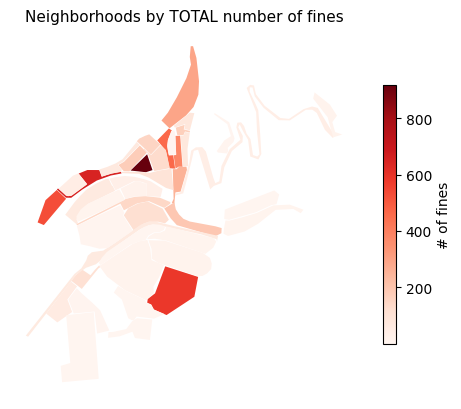

In [193]:
# Merge geographical dataframe with fine by streets dataframe
zumarraga_fines = zumarraga.merge(fines_streets, how="left",
                                  left_on="street", right_on=fines_streets.index)

# Plot a choropleth by total number of fines
fig, ax = plt.subplots()
zumarraga_fines.plot(ax=ax, column="total", legend=True, cmap="Reds",
                    legend_kwds={'label': "# of fines", "shrink": 0.7})
ax.set_title("Neighborhoods by TOTAL number of fines", size=11)
ax.set_axis_off()
plt.show()

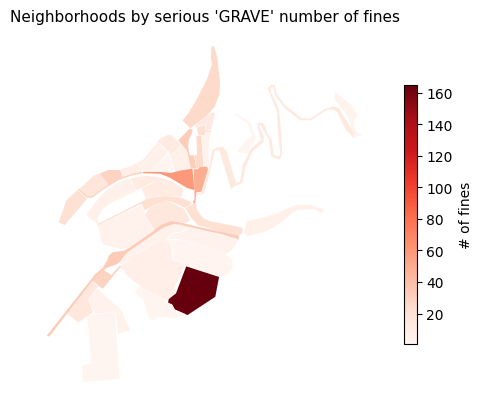

In [194]:
# Plot a choropleth by total number of serious (GRAVE) fines
fig, ax = plt.subplots()
zumarraga_fines.plot(ax=ax, column="GRAVE", legend=True, cmap="Reds",
                    legend_kwds={'label': "# of fines", "shrink": 0.7})
ax.set_title("Neighborhoods by serious 'GRAVE' number of fines", size=11)
ax.set_axis_off()
plt.show()

### Fines by year

In [195]:
# Group by year and fine category, then sum up fines
fines_years = fines.groupby(["year", "category"])["fines"].sum().unstack()

# Rearrange column order: LEVE, GRAVE, MUY GRAVE
fines_years = fines_years.iloc[:, [1, 0, 2]]

# Create new column with the total amount of fines: LEVE + GRAVE + MUY GRAVE
fines_years["total"] = fines_years.sum(axis=1)

print(fines_years)

category  LEVE  GRAVE  MUY GRAVE  total
year                                   
2018      1112    194          4   1310
2019       583    104          2    689
2020      1183     95          1   1279
2021       918    167         11   1096
2022      1604    158         11   1773


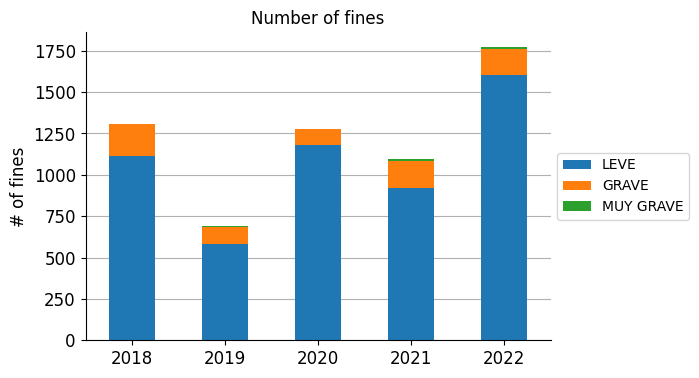

In [196]:
# Plot
fig, ax = plt.subplots(figsize=(6, 4))

fines_years.drop(["total"], axis=1).plot(ax=ax, kind="bar", stacked=True)

ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)
ax.set_title("Number of fines", fontsize=12)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("# of fines", fontsize=12)
ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left', fontsize=10)
sns.despine()

plt.show()

### Fines by year and street

In [197]:
# Group by year, street and fine category, then sum up fines
fines_years_streets = fines.groupby(["year", "street", "category"])["fines"].sum().unstack()

# Rearrange column order: LEVE, GRAVE, MUY GRAVE
fines_years_streets = fines_years_streets.iloc[:, [1, 0, 2]]

# Create new column with the total amount of fines
fines_years_streets["total"] = fines_years_streets.sum(axis=1)

print(fines_years_streets)

category                   LEVE  GRAVE  MUY GRAVE  total
year street                                             
2018 ANTIO                  9.0    3.0        NaN   12.0
     ANTONINO ORAA KALEA    1.0    1.0        NaN    2.0
     ARGIXAO AUZOA          1.0    NaN        NaN    1.0
     ARTIZ AUZOA           24.0    1.0        NaN   25.0
     BELOKI HIRIBIDEA      12.0    3.0        NaN   15.0
...                         ...    ...        ...    ...
2022 SORALUCE KALEA         6.0    NaN        NaN    6.0
     TXURRUKA KALEA        43.0    1.0        1.0   45.0
     URDANETA HIRIBIDEA    62.0    5.0        NaN   67.0
     UROLA KALEA            9.0    1.0        NaN   10.0
     ZELAI-ARIZTI PARKEA  209.0    1.0        NaN  210.0

[189 rows x 4 columns]


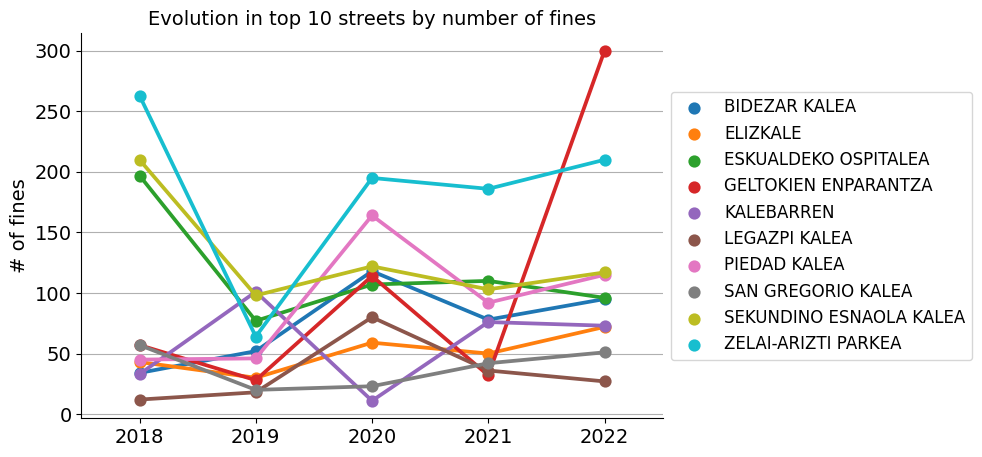

In [198]:
# Create a list with the names of the top 10 fine streets
fines_streets_top10 = fines_streets.iloc[:10].index

# Filter top 10 streets
fines_years_streets = fines_years_streets.reset_index()
fines_years_streets_top10 = fines_years_streets[fines_years_streets["street"]\
                                                .isin(fines_streets_top10)]

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

sns.pointplot(ax=ax, x="year", y="total", data=fines_years_streets_top10,
              hue="street")

ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)
ax.set_title("Evolution in top 10 streets by number of fines", fontsize=14)
ax.set_xlabel("", fontsize=13)
ax.set_ylabel("# of fines", fontsize=14)
ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left', fontsize=12)
sns.despine()

plt.show()

### Money raised from fines

In [199]:
# Create new column with the total amount
fines["paid_unpaid"] = fines["paid"] + fines["unpaid"]

# Group by year and fine category, then sum up fines
fines_money = fines.groupby(["year", "category"])["paid_unpaid"].sum().unstack()

# Rearrange column order: LEVE, GRAVE, MUY GRAVE
fines_money = fines_money.iloc[:, [1, 0, 2]]

# Create new column with the total amount of money raised
fines_money["total"] = fines_money.sum(axis=1)

print(fines_money)

category      LEVE     GRAVE  MUY GRAVE     total
year                                             
2018      19548.05  16623.60    1704.95  37876.60
2019       8359.39   8695.95     500.00  17555.34
2020      11778.40   6099.65     500.00  18378.05
2021      14145.21  14438.45    1134.95  29718.61
2022      27313.80  13633.91    4499.75  45447.46


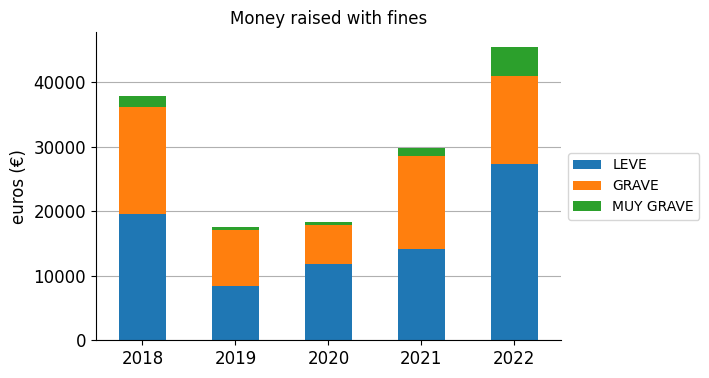

In [200]:
# Plot
fig, ax = plt.subplots(figsize=(6, 4))

fines_money.drop(["total"], axis=1).plot(ax=ax, kind="bar", stacked=True)

ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)
ax.set_title("Money raised with fines", fontsize=12)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("euros (€)", fontsize=12)
ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left', fontsize=10)
sns.despine()

plt.show()

In [201]:
# How much money do they rise on average per year?
avg_year = fines_money["total"].mean()

print(f"Average amount of money raised per year: {round(avg_year, -3):.0f} €")

Average amount of money raised per year: 30000 €


## Conclusions